In [1]:
pwd

'c:\\Users\\vvtom\\YandexDisk\\Prog\\ITNordic\\Final_project'

Импортируем библиотеки

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

input_folder = 'input_data'
output_folder = 'output_data'

for dirname, _, filenames in os.walk('c:\\Users\\vvtom\\YandexDisk\\Prog\\ITNordic\\Final_project\\input_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

c:\Users\vvtom\YandexDisk\Prog\ITNordic\Final_project\input_data\events.csv
c:\Users\vvtom\YandexDisk\Prog\ITNordic\Final_project\input_data\item_properties_part1.csv
c:\Users\vvtom\YandexDisk\Prog\ITNordic\Final_project\input_data\item_properties_part2.csv


In [4]:
events_df = pd.read_csv('input_data\events.csv')

In [5]:
events_df

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


In [6]:
item_properties1_df = pd.read_csv('input_data\item_properties_part1.csv')
item_properties2_df = pd.read_csv('input_data\item_properties_part2.csv')

In [7]:
events_df['datetime'] = events_df.timestamp.apply(lambda ts: datetime.fromtimestamp(ts/1000)) # миллисекунды переводим в секунды

In [8]:
events_df

,timestamp,visitorid,event,itemid,transactionid,datetime
0,1433221332117,257597,view,355908,NaN,2015-06-02 08:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 08:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 08:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 08:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 08:02:17.106
...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 06:13:05.939
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 06:30:13.142
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 05:57:00.527
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 06:08:50.703


In [9]:
# from datetime import datetime, timedelta
# ts = 1433221332117/1000
# t = datetime.fromtimestamp(ts)
# t

In [10]:
# Фильтр по дате
# число.месяц.год
# start_date = '01.07.2015' # введите начальную дату число.месяц.год
# end_date = '02.07.2015' # введите конечную дату число.месяц.год
# start_date = datetime.strptime(start_date, "%d.%m.%Y")
# end_date = datetime.strptime(end_date, "%d.%m.%Y")
# print(start_date)
# print(end_date)

In [11]:
# events_df.datetime == datetime.strptime('04.07.2015', "%d.%m.%Y")

Фильтр датафрейма по дате

In [12]:
def date_interval(df):
    # Запрос начальной и конечной даты для фильтра по времени
    start_date = datetime.strptime(input('Введите начальную дату (число.месяц.год): '), "%d.%m.%Y")
    end_date = datetime.strptime(input('Введите конечную дату(не включительно!) (число.месяц.год): '), "%d.%m.%Y")
    # Фильтр по времени
    filter_data_events = df[(df.datetime > start_date)&(df.datetime < end_date + timedelta(days=1))]
    return filter_data_events

# date_interval()

In [63]:
def date_interval_1(df, start_date, end_date):
    # Фильтр по времени
    filter_data_events = df[(df.datetime > start_date)&(df.datetime < end_date)]
    return filter_data_events

Отчет RFM

userid: int # идентификатор пользователя, на основании колонки visitorid из табл events

R: int # актуальность посещения(активность пользователя), 1 -самый устаревший, 5 - самый свежий
группируем по id сортируем по timestamp(по последнему действию)

F: int # частота событий/ частота просмотров/ частота покупок+перемещений в корзину

M: int # кол-во транзакций за период времени по колонке transactionid





In [14]:
# events_df.groupby(visitorid).max(timestamp)

In [15]:
events_df.datetime.describe()

count                          2756101
mean     2015-07-09 09:48:08.348103424
min         2015-05-03 06:00:04.384000
25%         2015-06-05 07:23:14.792000
50%      2015-07-09 17:43:33.599000064
75%         2015-08-10 19:45:05.168000
max         2015-09-18 05:59:47.788000
Name: datetime, dtype: object

In [64]:
start_date = datetime.strptime('05.06.2015', "%d.%m.%Y")
end_date = datetime.strptime('12.06.2015', "%d.%m.%Y") + timedelta(days=1)

events_df_transactions = date_interval_1(events_df, start_date, end_date)
temp = ['visitorid', 'itemid', 'transactionid', 'datetime']

RFD_data = events_df_transactions[temp]
RFD_data['transaction_datetime'] = RFD_data.datetime.where(RFD_data.transactionid.notna())
users_with_transactions = RFD_data.visitorid.where(RFD_data.transactionid.notna()).dropna().unique()
# len(users_with_transactions)
RFD_data = RFD_data[RFD_data.visitorid.isin(users_with_transactions)]

C:\Users\vvtom\AppData\Local\Temp\ipykernel_12072\901356113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFD_data['transaction_datetime'] = RFD_data.datetime.where(RFD_data.transactionid.notna())


In [66]:
now = end_date #.to_pydatetime()
# now.date()

In [78]:
RFD_table = RFD_data.groupby('visitorid').agg({'transaction_datetime': lambda x: (now - x.max()).days, # Recency
                                                             'transactionid': lambda x: len(x.unique()) # Frequency
                                                            })
# RFD_table.transaction_datetime = RFD_table.transaction_datetime.astype(int)

RFD_table.rename(columns={'transaction_datetime': 'R',
                          'transactionid': 'F'}, inplace=True)

RFD_table.sort_values(by='F', ascending=False)


,R,F
visitorid,,
841939,2,31
138131,1,30
1093035,1,29
1161163,0,28
76757,0,23
...,...,...
534217,1,2
534712,2,2
535618,1,2


In [79]:
RFD_table.R.value_counts()

R
4    97
1    95
2    89
3    87
7    81
6    63
0    57
5    55
Name: count, dtype: int64

In [80]:
RFD_table.F.value_counts()

F
2     559
3      35
4       8
6       4
9       3
13      2
31      1
11      1
10      1
1       1
29      1
20      1
5       1
17      1
7       1
16      1
30      1
23      1
28      1
Name: count, dtype: int64

In [81]:
RFD_data.groupby('transactionid')['itemid'].count().value_counts()

itemid
1     792
2     105
3      25
4       8
5       3
6       1
8       1
17      1
16      1
Name: count, dtype: int64

In [82]:
RFD_table.R.describe()

count    624.000000
mean       3.432692
std        2.210864
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: R, dtype: float64

In [95]:
RFD_table['R_rank'] = pd.qcut(x=RFD_table.R, q=3, labels=[3, 2, 1])
# RFD_table.drop(columns=['R_True','rank','F_True'], inplace=True)
RFD_table.sort_values(by='R_rank', ascending=True)

,R,F,R_rank,F_rank
visitorid,,,,
3847,1,2,3,1
792741,1,3,3,2
791361,1,2,3,1
783282,1,2,3,1
769676,1,2,3,1
...,...,...,...,...
1084617,6,2,1,1
1088465,5,2,1,1
1091107,6,2,1,1


In [96]:
pd.qcut(x=RFD_table.R, q=5)

visitorid
3847       (-0.001, 1.0]
4241       (-0.001, 1.0]
5117          (1.0, 3.0]
11333         (1.0, 3.0]
16158         (3.0, 4.0]
               ...      
1395774       (3.0, 4.0]
1397020       (3.0, 4.0]
1398811       (4.0, 6.0]
1399374    (-0.001, 1.0]
1402363       (1.0, 3.0]
Name: R, Length: 624, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 1.0] < (1.0, 3.0] < (3.0, 4.0] < (4.0, 6.0] < (6.0, 7.0]]

In [85]:
RFD_table.F.quantile()

2.0

In [97]:
pd.qcut(x=RFD_table.F, q=2)

visitorid
3847       (0.999, 2.0]
4241       (0.999, 2.0]
5117       (0.999, 2.0]
11333      (0.999, 2.0]
16158      (0.999, 2.0]
               ...     
1395774     (2.0, 31.0]
1397020    (0.999, 2.0]
1398811    (0.999, 2.0]
1399374    (0.999, 2.0]
1402363    (0.999, 2.0]
Name: F, Length: 624, dtype: category
Categories (2, interval[float64, right]): [(0.999, 2.0] < (2.0, 31.0]]

In [98]:
RFD_table['F_rank'] = pd.qcut(x=RFD_table.F, q=2, labels=[1,2])

In [112]:
# RFD_table.drop(columns=['F_rank'], inplace=True)
# RFD_table['F_rank'] = RFD_table.F.transform(lambda x: x.rank(method = 'first'))
RFD_table.F_rank
# RFD_table#.F.value_counts()

visitorid
3847       1
4241       1
5117       1
11333      1
16158      1
          ..
1395774    2
1397020    1
1398811    1
1399374    1
1402363    1
Name: F_rank, Length: 624, dtype: category
Categories (2, int64): [1 < 2]

In [113]:
RFD_table.sort_values(by='F', ascending=False).head(20)

,R,F,R_rank,F_rank
visitorid,,,,
841939,2,31,3,2
138131,1,30,3,2
1093035,1,29,3,2
1161163,0,28,3,2
76757,0,23,3,2
892355,0,20,3,2
748040,0,17,3,2
371604,0,16,3,2
1075423,4,13,2,2


In [114]:
RFD_table.to_csv(path_or_buf='output_data/test_RFD1.csv')

In [31]:
# df_temp = pd.read_csv(filepath_or_buffer='output_data/test_RFD.csv')
# df_temp

In [32]:
# https://stackoverflow.com/questions/59482017/bin-labels-must-be-one-fewer-than-the-number-of-bin-edges-after-passing-pd-qcu
# RFD_table['F_rank'] = RFD_table['F_rank'].transform(lambda x: pd.qcut(x, min(len(x),5), labels=range(1,min(len(x),5)+1), duplicates = 'drop'))
# RFD_table

In [33]:
# RFD_table['F_True'] = pd.qcut(x=RFD_table.F, q=5, labels=[1, 2, 3, 4, 5], duplicates='drop') # ValueError: Bin labels must be one fewer than the number of bin edges

# https://stackoverflow.com/questions/59482017/bin-labels-must-be-one-fewer-than-the-number-of-bin-edges-after-passing-pd-qcu
# RFD_table['F_rank'] = RFD_table.groupby([key])[sales].transform(lambda x: x.rank(method = 'first'))

# def q_cut(x, cuts):
#     unique_var = len(np.unique([i for i in x]))
#     labels1 = range(1, min(unique_var,cuts)+1)
#     output = pd.qcut(x, min(unique_var,cuts), labels= labels1, duplicates = 'drop')
#     return output

# df.groupby([key])['rank'].transform(lambda x: q_cut(x,10))`

In [34]:
RFD_table_q = RFD_table[['R', 'F']]
RFD_table_q

,R,F
visitorid,,
3847,1,4
4241,1,3
5117,3,9
11333,3,24
16158,4,5
...,...,...
1395774,4,6
1397020,4,2
1398811,6,24


НУЖНО НОРМАЛИЗОВАТЬ ЗНАЧЕНИЯ СТОЛБЦА F

In [35]:
RFD_table_q.F.describe()
# RFD_table_q

count    624.000000
mean      16.679487
std       42.893685
min        2.000000
25%        4.000000
50%        6.000000
75%       11.000000
max      398.000000
Name: F, dtype: float64

In [36]:
# df_temp = RFD_table_q.F
# df_norm = (df_temp-df_temp.min ())/ (df_temp.max () - df_temp.min ()) #не работает в этом случае
# df_norm.quantile(.25)
# df_norm.quantile(.75)

<Axes: >

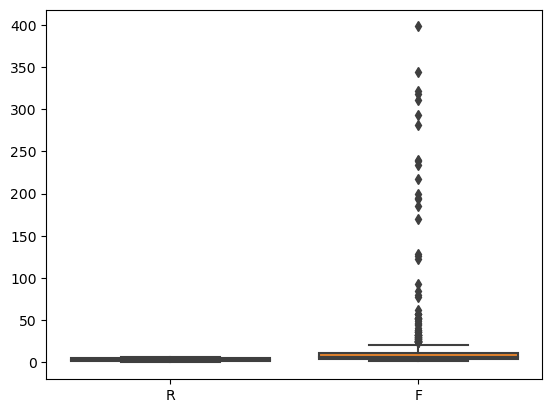

In [37]:
import seaborn as sns

F_temp = RFD_table_q['F']
# F_temp
sns.boxplot(RFD_table_q)

{'whiskers': [<matplotlib.lines.Line2D at 0x25a8003d250>,
 'caps': [<matplotlib.lines.Line2D at 0x25aa5dd6ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25a8003c790>],
 'medians': [<matplotlib.lines.Line2D at 0x25a8004c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25a8004cb10>],
 'means': []}

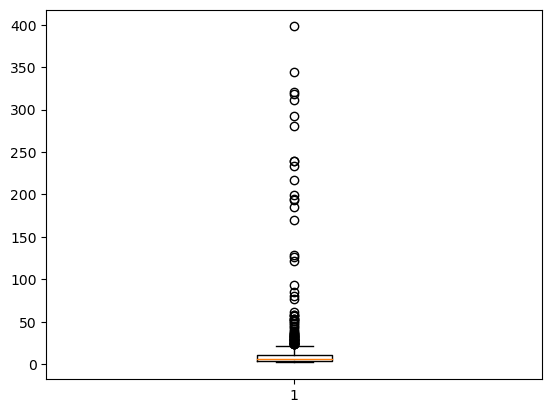

In [38]:
import matplotlib.pyplot as plt

plt.boxplot(F_temp)

In [39]:
RFD_table_q

,R,F
visitorid,,
3847,1,4
4241,1,3
5117,3,9
11333,3,24
16158,4,5
...,...,...
1395774,4,6
1397020,4,2
1398811,6,24


In [40]:
F1 = RFD_table_q.F.reset_index().drop(columns='visitorid', axis=1)
F1.F.max()
# F1.F.value_counts()

398

In [41]:
# стандартное отклонение (standard deviation): Можно удалить строки, в которых значение признака отклоняется более чем на несколько стандартных отклонений от среднего значения

mean = F1['F'].mean()
print('mean = ', mean)
std = F1['F'].std()
print('std = ', std)
threshold = 1
hight_border = mean + threshold * std
print('hight_border = ', hight_border)
low_border = mean - threshold * std
print('low_border = ', low_border)

df_without_ejection = F1[(F1['F'] < mean + threshold * std) & (F1['F'] > abs(mean - threshold * std))] # данные очищенные от выбросов
# df_ejection = F1[(F1['F'] > mean + threshold * std) | (F1['F'] < mean - threshold * std)] # выбросы в данном случае только > 23

max_F = df_without_ejection.max()
min_F = df_without_ejection.min()
print(max_F)
print(min_F)
print(df_without_ejection.value_counts())
# pd.qcut(df_without_ejection.F, q=5, duplicates='drop')

mean =  16.67948717948718
std =  42.89368501519563
hight_border =  59.57317219468281
low_border =  -26.21419783570845
F    58
dtype: int64
F    27
dtype: int64
F 
30    3
32    3
33    3
53    3
36    3
28    3
58    2
29    2
51    2
45    1
57    1
49    1
47    1
27    1
44    1
41    1
39    1
37    1
34    1
31    1
38    1
Name: count, dtype: int64


In [42]:
F1.value_counts()

F  
3      113
4       87
5       47
6       43
2       37
      ... 
62       1
77       1
80       1
85       1
398      1
Name: count, Length: 68, dtype: int64

In [43]:
from scipy import stats

# F1[(np.abs(stats.zscore(F1)) < 3)].value_counts()

In [44]:
# df_temp = F1.copy(deep=True)
# q_low = F1["F"].quantile(0.01)
# q_hi  = F1["F"].quantile(0.99)

# df_temp_cleen = F1[(F1["F"] < q_hi) & (F1["F"]> q_low)]
# df_temp_cleen.quantile(q=[0.2, 0.4, 0.6, 0.8])
# df_temp_cleen.value_counts()
# pd.qcut(df_temp_cleen['F'], q=5, duplicates='drop') # Categories (2, interval[float64, right]): [(1.999, 3.0] < (3.0, 5.0]]
# max_temp = df_temp_cleen.max()
# print(max_temp)
# min_temp = df_temp_cleen.min()
# print(min_temp)
# df_temp[(df_temp['F'] >= q_hi)] = max_temp
# df_temp[(df_temp['F'] <= q_low)] = min_temp
# df_temp.quantile(q=[0.2, 0.4, 0.6, 0.8])

# pd.qcut(df_temp['F'], q=5, duplicates='drop')



In [45]:
# F1.F[(F1['F'] > mean + threshold * std)] = max_F # приравнять все выбросы выше нормы к максимуму выборки без выбросов
# F1.F[(F1['F'] < mean - threshold * std)] = min_F # приравнять все выбросы выше нормы к минимуму выборки без выбросов
# F1.F.value_counts()
# F1.sort_values(by='F', ascending=False)
# F1.F.max()
# F1.F.min()

In [46]:
F1.quantile(q=[0.2, 0.4, 0.6, 0.8])

,F
0.2,3.0
0.4,5.0
0.6,8.0
0.8,14.0


In [47]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# data = np.array(F1)

# # Нормализация данных
# scaler = MinMaxScaler()
# normalized_data = scaler.fit_transform(data)
# # print("Нормализованные данные:")
# # print(normalized_data)

# # Стандартизация данных
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(data)
# # print("Стандартизованные данные:")
# # print(standardized_data)
# pd.DataFrame(standardized_data).quantile(q=[0.2, 0.4, 0.6, 0.8])
# # standardized_data.shape
# # standardized_data.
# # RFD_table_q['F_standart'] = standardized_data.tolist()
# # RFD_table_q

In [48]:
# import scipy.stats as stats

# z = np.abs(stats.zscore('RFD_table_q.F'))

# #only keep rows in dataframe with all z-scores less than absolute value of 3 
# data_clean = RFD_table_q.F[(z<3).all(axis=1)]

# #find how many rows are left in the dataframe 
# data_clean.shape


In [49]:
# # F_array = np.array(RFD_table_q['F'])
# # F_array1 = pp.normalize([F_array])
# # F_array
# # # F_df = pd.Series(data=F_array, )
# # # F_df

# F_array = np.linalg.norm(F_array, ord=np.inf, axis=0, keepdims=True)
# F_array
# F_df = pd.DataFrame(data=F_array).transpose()
# F_df.rename(columns={0: 'F_norm'}, inplace=True)
# F_df.quantile(q=[0.2, 0.4, 0.6, 0.8])

In [50]:
quantiles = RFD_table_q.quantile(q=[0.2, 0.4, 0.6, 0.8])
quantiles

,R,F
0.2,1.0,3.0
0.4,3.0,5.0
0.6,4.0,8.0
0.8,6.0,14.0


Работа с товарами в каталоге и в действиях в магазине

In [51]:
items_with_events = events_df['itemid'].drop_duplicates().reset_index()
items_with_events['items_with_events'] = 1

In [52]:
items_in_catalog = item_properties1_df['itemid'].drop_duplicates().reset_index()
items_in_catalog['items_in_catalog'] = 1

In [53]:
items_in_catalog.merge(items_with_events, how='outer', on='itemid') \
    .fillna(0) \
    .groupby(['items_in_catalog','items_with_events'])['itemid'] \
    .count() \
    .reset_index()

,items_in_catalog,items_with_events,itemid
0,0.0,1.0,49815
1,1.0,0.0,231807
2,1.0,1.0,185246


In [54]:
# учитывать срез времени
# считать срез по каждому событию


In [55]:
# duration - промежуток 30 минут
# интервал между событиями
# 

Работа с временными промежутками в действиях пользователей при помощи оконных функций 

In [56]:
events_df = events_df.sort_values('datetime')

In [57]:
events_df['diffdate'] = events_df.groupby('visitorid')['datetime'].diff(1)#.diff(1).reset_index()

In [58]:
events_df['shiftdate'] = events_df.groupby('visitorid')['datetime'].shift(1)

In [59]:
events_df[events_df['visitorid'] == 530559].sort_values('datetime')

,timestamp,visitorid,event,itemid,transactionid,datetime,diffdate,shiftdate
283227,1434394765103,530559,view,393768,NaN,2015-06-15 21:59:25.103,NaT,NaT
275413,1434394835604,530559,view,393768,NaN,2015-06-15 22:00:35.604,0 days 00:01:10.501000,2015-06-15 21:59:25.103
280834,1434394900847,530559,view,369158,NaN,2015-06-15 22:01:40.847,0 days 00:01:05.243000,2015-06-15 22:00:35.604
280956,1434394971923,530559,view,393768,NaN,2015-06-15 22:02:51.923,0 days 00:01:11.076000,2015-06-15 22:01:40.847
263739,1434395108755,530559,view,360487,NaN,2015-06-15 22:05:08.755,0 days 00:02:16.832000,2015-06-15 22:02:51.923
...,...,...,...,...,...,...,...,...
1446514,1442451938125,530559,view,322873,NaN,2015-09-17 04:05:38.125,0 days 01:02:04.369000,2015-09-17 03:03:33.756
1450287,1442455388726,530559,view,459659,NaN,2015-09-17 05:03:08.726,0 days 00:57:30.601000,2015-09-17 04:05:38.125
1450225,1442455575597,530559,view,176363,NaN,2015-09-17 05:06:15.597,0 days 00:03:06.871000,2015-09-17 05:03:08.726
1442858,1442456014905,530559,view,459659,NaN,2015-09-17 05:13:34.905,0 days 00:07:19.308000,2015-09-17 05:06:15.597


In [60]:
events_df.visitorid.value_counts()

visitorid
1150086    7757
530559     4328
152963     3024
895999     2474
163561     2410
           ... 
1184575       1
273003        1
705532        1
541335        1
622226        1
Name: count, Length: 1407580, dtype: int64

In [61]:
l=[]
l.append(2).append(3)

AttributeError: 'NoneType' object has no attribute 'append'

In [59]:
item_properties1_df.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [147]:
events_df

,timestamp,visitorid,event,itemid,transactionid,datetime,diffdate,shiftdate
1462974,1430622004384,693516,addtocart,297662,NaN,2015-05-03 06:00:04.384,NaT,NaT
1464806,1430622011289,829044,view,60987,NaN,2015-05-03 06:00:11.289,NaT,NaT
1463000,1430622013048,652699,view,252860,NaN,2015-05-03 06:00:13.048,NaT,NaT
1465287,1430622024154,1125936,view,33661,NaN,2015-05-03 06:00:24.154,NaT,NaT
1462955,1430622026228,693516,view,297662,NaN,2015-05-03 06:00:26.228,0 days 00:00:21.844000,2015-05-03 06:00:04.384
...,...,...,...,...,...,...,...,...
1461164,1442545164029,472345,view,301436,NaN,2015-09-18 05:59:24.029,NaT,NaT
1456543,1442545165499,1207677,view,310922,NaN,2015-09-18 05:59:25.499,NaT,NaT
1456783,1442545174109,255126,view,47467,NaN,2015-09-18 05:59:34.109,NaT,NaT
1454122,1442545181778,622226,view,345308,NaN,2015-09-18 05:59:41.778,NaT,NaT


In [53]:
events_df.sort_values('datetime', ascending=False)
events_df[['visitorid', 'itemid', 'transactionid', 'datetime']][events_df.transactionid.notna()].groupby('visitorid').max('datetime')

,itemid,transactionid
visitorid,,
172,465522,9725.0
186,49029,8726.0
264,459835,8445.0
419,19278,16455.0
539,94371,14778.0
...,...,...
1406787,336832,15915.0
1406981,436004,686.0
1407070,215596,5064.0


In [19]:
start_date = datetime.strptime('10.05.2015', "%d.%m.%Y")
end_date = datetime.strptime('10.09.2015', "%d.%m.%Y")

print(start_date)
print(end_date)
period = (end_date - start_date).days
period

2015-05-10 00:00:00
2015-09-10 00:00:00


123

In [24]:
temp = ['visitor_id', 'transaction_id', 'transaction_date', 'engagement']

RFE_data = pd.DataFrame(columns=temp)
RFE_data

,visitor_id,transaction_id,transaction_date,engagement


In [20]:
events_df.groupby('visitorid').agg({''})

,timestamp,event,itemid,transactionid,datetime
visitorid,,,,,
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
1407575,True,True,True,True,True
1407576,True,True,True,True,True
1407577,True,True,True,True,True


In [42]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   datetime       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 126.2+ MB


In [47]:
events_df.visitorid.value_counts()

visitorid
1150086    7757
530559     4328
152963     3024
895999     2474
163561     2410
           ... 
698825        1
843029        1
1271425       1
394545        1
1184451       1
Name: count, Length: 1407580, dtype: int64

In [16]:
events_df[events_df.transactionid.notna()].groupby('itemid')['transactionid'].count().sort_values()

itemid
15          1
275219      1
275344      1
275361      1
275485      1
         ... 
312728     46
7943       46
213834     92
119736     97
461686    133
Name: transactionid, Length: 12025, dtype: int64

In [17]:
events_df[events_df['itemid'] == 46962]

,timestamp,visitorid,event,itemid,transactionid,datatime


In [18]:
item_properties1_df.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [38]:
item_properties1_df[item_properties1_df.property == '888']

,timestamp,itemid,property,value
1,1441508400000,206783,888,1116713 960601 n277.200
10,1439089200000,450113,888,1038400 45956 n504.000
17,1436670000000,319291,888,1292080
26,1435460400000,16615,888,150169 176547 824301 24474 293011 1240134
40,1433646000000,152892,888,599031
...,...,...,...,...
10999957,1442113200000,351827,888,705819 1053337 n2400.000 1128577 481453 n240.0...
10999972,1431831600000,230569,888,879440 735645 276028 1230496
10999983,1435460400000,160433,888,199853 874143 538839
10999988,1436065200000,186880,888,150169 304545 n847392.000 823151


In [19]:
item_properties1_df['property'].unique()

array(['categoryid', '888', '400', ..., '424', '494', '712'], dtype=object)

In [20]:
item_properties1_df['property'].value_counts().head(50)

property
888           1629817
790            970800
available      817387
categoryid     426305
6              343207
283            323681
776            311654
678            261829
364            256340
202            242984
839            226921
159            226502
917            226437
764            226242
112            226102
227            188209
698            157281
451            142388
663            131331
962            128976
400            118416
689            116244
28              93598
928             87128
1036            79306
810             77540
544             62450
348             61416
713             56559
1032            44011
19              41218
566             39614
581             36959
978             34777
981             33873
720             30199
960             29602
243             29445
38              29413
46              29310
434             29117
71              28424
797             27865
591             27420
961             27000
4

Все значения в файле “item_properties.csv", за исключением свойств "categoryid" и "доступно", были хэшированы. Значение свойства "categoryid" содержит идентификатор категории товара. Значение свойства "доступно" содержит доступность товара, т.е. 1 означает, что товар был доступен, в противном случае 0. Все числовые значения были отмечены символом "n" в начале и имеют точность в 3 цифры после запятой, например, "5" станет "n5.000", "-3.67584" станет "n-3.675". Все значения слов в тексте были нормализованы (процедура определения основы: https://en.wikipedia.org/wiki/Stemming) и хэшированные числа были обработаны, как указано выше, например, текст "Привет, мир, 2017!" станет "24214 44214 n2017.000"

In [21]:
item_properties1_df[item_properties1_df['property'] == 'categoryid']

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
140,1432436400000,281245,categoryid,1277
151,1435460400000,35575,categoryid,1059
189,1437274800000,8313,categoryid,1147
197,1437879600000,55102,categoryid,47
...,...,...,...,...
10999880,1432436400000,441523,categoryid,1167
10999917,1433041200000,250848,categoryid,769
10999932,1438484400000,116380,categoryid,1509
10999960,1431226800000,84186,categoryid,209


In [22]:
item_properties1_df[item_properties1_df['property'] == 'categoryid']

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
140,1432436400000,281245,categoryid,1277
151,1435460400000,35575,categoryid,1059
189,1437274800000,8313,categoryid,1147
197,1437879600000,55102,categoryid,47
...,...,...,...,...
10999880,1432436400000,441523,categoryid,1167
10999917,1433041200000,250848,categoryid,769
10999932,1438484400000,116380,categoryid,1509
10999960,1431226800000,84186,categoryid,209


In [23]:
item_properties1_df[item_properties1_df['itemid'] == 461686]#.drop_duplicates('property')

,timestamp,itemid,property,value
338941,1431226800000,461686,available,1
1807566,1433646000000,461686,713,370498
2110763,1433041200000,461686,521,769062
5276504,1431831600000,461686,283,550504 827388 750982 528881 1100924 245814 237...
6806347,1432436400000,461686,19,769062
7534725,1433041200000,461686,112,679677
8310869,1431226800000,461686,776,811925
10769671,1431226800000,461686,764,1285872
10885665,1433041200000,461686,810,769062


In [24]:
item_properties1_df[item_properties1_df['property'] == '790'].sort_values('value', ascending=False)

,timestamp,itemid,property,value
898127,1439694000000,46962,790,n99996.000
8625765,1442113200000,184412,790,n999840.000
3957251,1437879600000,223158,790,n999840.000
978330,1442113200000,214907,790,n999840.000
10940852,1433646000000,292674,790,n999840.000
...,...,...,...,...
5368516,1436065200000,237616,790,n0.000
5368322,1433646000000,282278,790,n0.000
9446360,1433041200000,257665,790,n0.000
6919195,1435460400000,339907,790,n0.000


In [25]:
events_df[events_df['itemid'] == 184412]

,timestamp,visitorid,event,itemid,transactionid,datatime
30391,1433278441917,77390,view,184412,NaN,2015-06-02 23:54:01.917
30406,1433278259515,77390,view,184412,NaN,2015-06-02 23:50:59.515
30478,1433278313627,77390,view,184412,NaN,2015-06-02 23:51:53.627
45959,1433278221695,77390,view,184412,NaN,2015-06-02 23:50:21.695
45970,1433278331999,77390,view,184412,NaN,2015-06-02 23:52:11.999
...,...,...,...,...,...,...
2161877,1436248574988,246506,view,184412,NaN,2015-07-07 08:56:14.988
2219411,1436399194889,109074,view,184412,NaN,2015-07-09 02:46:34.889
2324063,1436817362030,1119917,view,184412,NaN,2015-07-13 22:56:02.030
2344475,1436915014111,454700,view,184412,NaN,2015-07-15 02:03:34.111


In [26]:
events_df

,timestamp,visitorid,event,itemid,transactionid,datatime
0,1433221332117,257597,view,355908,NaN,2015-06-02 08:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 08:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 08:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 08:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 08:02:17.106
...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 06:13:05.939
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 06:30:13.142
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 05:57:00.527
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 06:08:50.703


In [27]:
item_properties1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB
